In [68]:
# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt

# Set simulation parameters
Vthresh = -50   #mV
Vreset  = -70   #mV max
Vspike  =  20   #mV
Rm      =  10   #MOhms lower Resistance = lower spikes
tau     =  10   #ms
dt      =  0.1 #ms
counter =  0
i = 0 #counting the number of iterations


In [69]:
# Creates a vector of time points from 0 to 499 ms in steps of dt=0.01ms
timeVector = np.arange(0, 500, dt)

# Creates a placeholder for our voltages that is the same size as timeVector
voltageVector = np.zeros(len(timeVector))

voltVec = np.zeros(len(timeVector))

# Creates a placeholder for the external stimulation vector.
# It is also the same size as the time vector.
stimVector = np.zeros(len(timeVector))

In [70]:
#as determined by the problem (given)

# Sets the external stimulation to 2.0001 nA for the first 500 ms
stimVector[0:] = 2.0001

#all entries are the same
#2.0001nA for V = -70mV
#1.01nA for V = -60mV

In [71]:
# Set the initial voltage to be equal to the resting potential
voltageVector[0] = Vreset

In [72]:
# This line initiates the loop. "S" counts the number of loops.
# We are looping for 1 less than the length of the time vector
# because we have already calculated the voltage for the first
# iteration.
for S in range(len(timeVector)-1):
  # Vinf is set to equal the resting potential plus the product
  # of the stimulation vector at the Sth time point.
    
    Vinf= Vreset + Rm * stimVector[S] # (E + I*R)
  
  # The next voltage value is is equal to where we are going (Vinf)
  # plus the product of the different between the present voltage and
  # Vinf (how far we have to go) and e^-t/tau (how far we are going
  # in each step)
    voltageVector[S+1] = Vinf + (voltageVector[S]-Vinf)*np.exp(-dt/tau)

    
  # This 'if' condition states that if the next voltage is greater than
  # or equal to the threshold, then to run the next section
    if voltageVector[S+1] >= Vthresh:
     # This states that the next voltage vector will be the Vspike value
        voltageVector[S+1] = Vspike
     
     # This 'if' statement checks if we are already at Vspike (this is
     # another way we can be above Vthresh)
        if voltageVector[S] == Vspike:
            #print(S) This prints the timing of spikes
            voltVec[i] = 1 #add a 1 to indicate a spike in voltVec
            
        # Set the next voltage equal to the reset value
            voltageVector[S+1] = Vreset
        
        # This will count the number of observed spikes so that spike count
        # rate may be calculated later
            counter += 1
            #voltvec to spike vec
    i +=1

The Firing Rate is 10Hz.


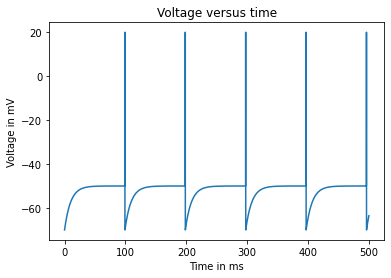

In [73]:
# This sets the new plot object
plt.figure()

# This plots the voltage (y-axis) as a function of time (x-axis)
plt.plot(timeVector, voltageVector)

# This labels the y-axis
plt.ylabel('Voltage in mV')

# This labels the x-axis
plt.xlabel('Time in ms')

# This sets the title
plt.title('Voltage versus time')

#print(np.count_nonzero(voltVec ==1))
#print(counter)

print("The Firing Rate is " + str(counter * 2) + "Hz." )

In [74]:
#Pull the times of spiking


for y in range(len(voltVec)): #grab index of 1 and compare to timeVector

    if voltVec[y] == 1:
        temp_index = y
        
        print(timeVector[y])
    
    

99.10000000000001
198.3
297.5
396.70000000000005
495.90000000000003
